In [42]:
import matplotlib.pyplot as plt
import pycbc.noise
import pycbc.psd

## Name of the PSD curves

In [43]:
print(pycbc.psd.analytical.get_lalsim_psd_list(), "\n \n \n")

print(pycbc.psd.analytical.get_psd_model_list(), "\n \n \n")

print(pycbc.psd.analytical.get_pycbc_psd_list())

['AdVBNSOptimizedSensitivityP1200087', 'AdVDesignSensitivityP1200087', 'AdVEarlyHighSensitivityP1200087', 'AdVEarlyLowSensitivityP1200087', 'AdVLateHighSensitivityP1200087', 'AdVLateLowSensitivityP1200087', 'AdVMidHighSensitivityP1200087', 'AdVMidLowSensitivityP1200087', 'AdVO3LowT1800545', 'AdVO4IntermediateT1800545', 'AdVO4T1800545', 'AdvVirgo', 'CosmicExplorerP1600143', 'CosmicExplorerPessimisticP1600143', 'CosmicExplorerWidebandP1600143', 'EinsteinTelescopeP1600143', 'GEO', 'GEOHF', 'KAGRA', 'KAGRA128MpcT1800545', 'KAGRA25MpcT1800545', 'KAGRA80MpcT1800545', 'KAGRADesignSensitivityT1600593', 'KAGRAEarlySensitivityT1600593', 'KAGRALateSensitivityT1600593', 'KAGRAMidSensitivityT1600593', 'KAGRAOpeningSensitivityT1600593', 'TAMA', 'Virgo', 'aLIGO140MpcT1800545', 'aLIGO175MpcT1800545', 'aLIGOAPlusDesignSensitivityT1800042', 'aLIGOAdVO3LowT1800545', 'aLIGOAdVO4IntermediateT1800545', 'aLIGOAdVO4T1800545', 'aLIGOBHBH20Deg', 'aLIGOBHBH20DegGWINC', 'aLIGOBNSOptimizedSensitivityP1200087', 'aL

## Different techniques of PSD estimation

You can find it in more details in : https://pycbc.org/pycbc/latest/html/pycbc.psd.html

It has LIGO noise components for thermal noise, seismic noise and shot noise and so on...

131072
131072
131072
131072


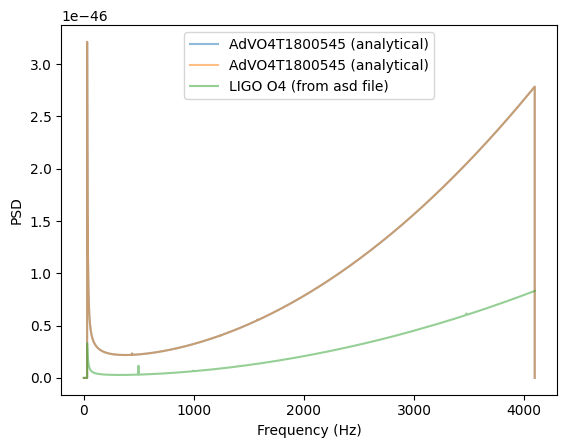

In [64]:
""" PSD estimation"""

""" Method - I """

# The color of the noise matches a PSD which you provide
flow = 30.0
delta_f = 1.0 / 32
flen = int(4096 / delta_f) 
print(flen)
psd = pycbc.psd.AdVO4T1800545(flen, delta_f, flow)
print(len(psd))

plt.plot(psd.sample_frequencies, psd, label="AdVO4T1800545 (analytical)", alpha=0.5)

""" Method - II """

psd2 = pycbc.psd.analytical.from_string(psd_name= 'AdVO4T1800545', length = flen, delta_f = delta_f , low_freq_cutoff=30)
print(len(psd2))
plt.plot(psd2.sample_frequencies, psd2, label="AdVO4T1800545 (analytical)", alpha=0.5)

""" Method - III """

psd3= pycbc.psd.read.from_txt(filename='LIGO_asd_O4.txt', length= flen, delta_f= delta_f, low_freq_cutoff= flow, is_asd_file=True)
print(len(psd3))
plt.plot(psd3.sample_frequencies, psd3, label="LIGO O4 (from asd file)", alpha=0.5)
plt.ylabel('PSD')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

## Time domain noise generation

131072
131072
131072
131072
131072


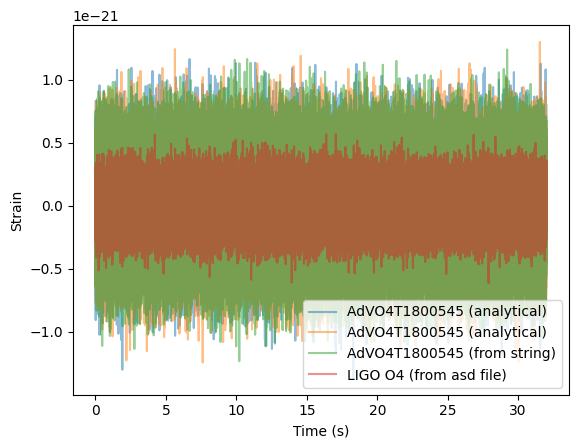

In [71]:
# Generate 32 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(32 / delta_t)
print(tsamples)
noise1 = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=1273)
print(len(noise1))

noise2 = pycbc.noise.gaussian.noise_from_psd(tsamples, delta_t, psd2, seed=1277)
print(len(noise2))

noise3=pycbc.noise.gaussian.noise_from_string(psd_name="AdVO4T1800545", length=tsamples, delta_t=delta_t, seed=1271, low_frequency_cutoff=30.0)
print(len(noise3))

noise4 = pycbc.noise.noise_from_psd(tsamples, delta_t, psd3, seed=1271)
print(len(noise4))

plt.plot(noise1.sample_times, noise1, alpha=0.5, label="AdVO4T1800545 (analytical)")
plt.plot(noise2.sample_times, noise2, alpha=0.5, label="AdVO4T1800545 (analytical)")
plt.plot(noise3.sample_times, noise3, alpha=0.5, label="AdVO4T1800545 (from string)")
plt.plot(noise4.sample_times, noise4, alpha=0.5, label="LIGO O4 (from asd file)")
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

## Frequency domain noise generation

Notice that FFT from timeseries follows Nyquist theorem 

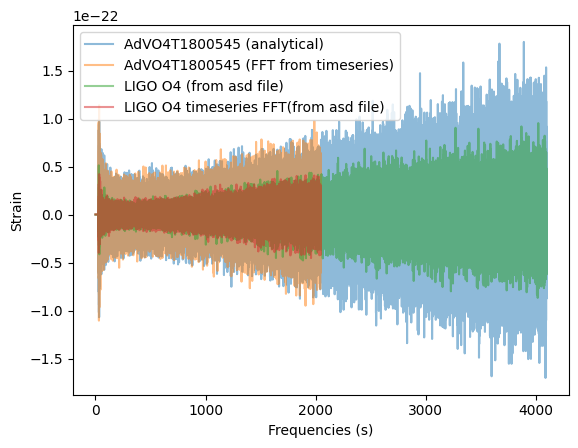

In [86]:
noise_f=pycbc.noise.gaussian.frequency_noise_from_psd(psd, seed=None)

noise_f2 = noise2.to_frequencyseries()

noise_f3=pycbc.noise.gaussian.frequency_noise_from_psd(psd3, seed=None)

noise_f4 = noise4.to_frequencyseries()

plt.plot(noise_f.sample_frequencies, noise_f, alpha=0.5, label="AdVO4T1800545 (analytical)")
plt.plot(noise_f2.sample_frequencies, noise_f2, alpha=0.5, label="AdVO4T1800545 (FFT from timeseries)")
plt.plot(noise_f3.sample_frequencies, noise_f3, alpha=0.5, label="LIGO O4 (from asd file)")
plt.plot(noise_f4.sample_frequencies, noise_f4, alpha=0.5, label="LIGO O4 timeseries FFT(from asd file)")
plt.ylabel('Strain')
plt.xlabel('Frequencies (s)')
plt.legend()
plt.show()